## Problem Statement

Hi Everyone, The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. So now your aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __How to Make a Submission?__
* __Guidelines for Final Submission__

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train = pd.read_csv("D:/analytics_vidhya/train_v9rqX0R.csv")
test = pd.read_csv("D:/analytics_vidhya/test_AbJTz2l.csv")

In [3]:
#type(train)

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

* __We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.__

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

__3.1 Item Weight__

<AxesSubplot:xlabel='Item_Weight'>

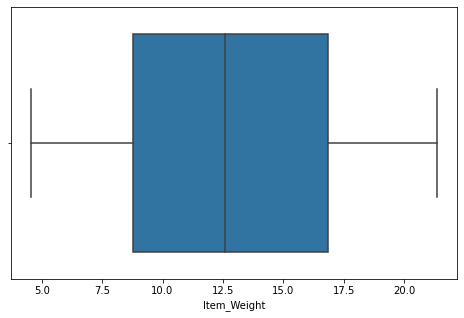

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

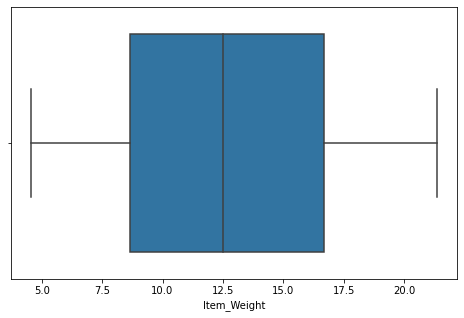

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [13]:
# Imputing with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [14]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [15]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [16]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


__Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [17]:
#Imputing with Mode
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [18]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Outlet_Size.__

### Step 4: Exploratory Data Analysis

In [19]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [22]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [23]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

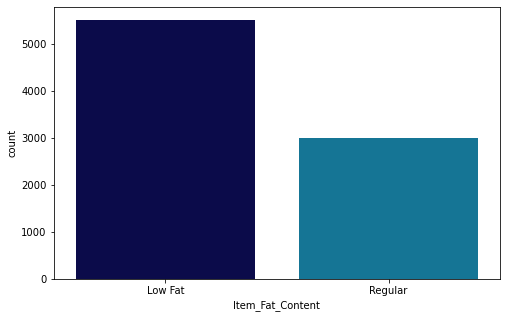

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

__The Items bought are more of Low Fat.__

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

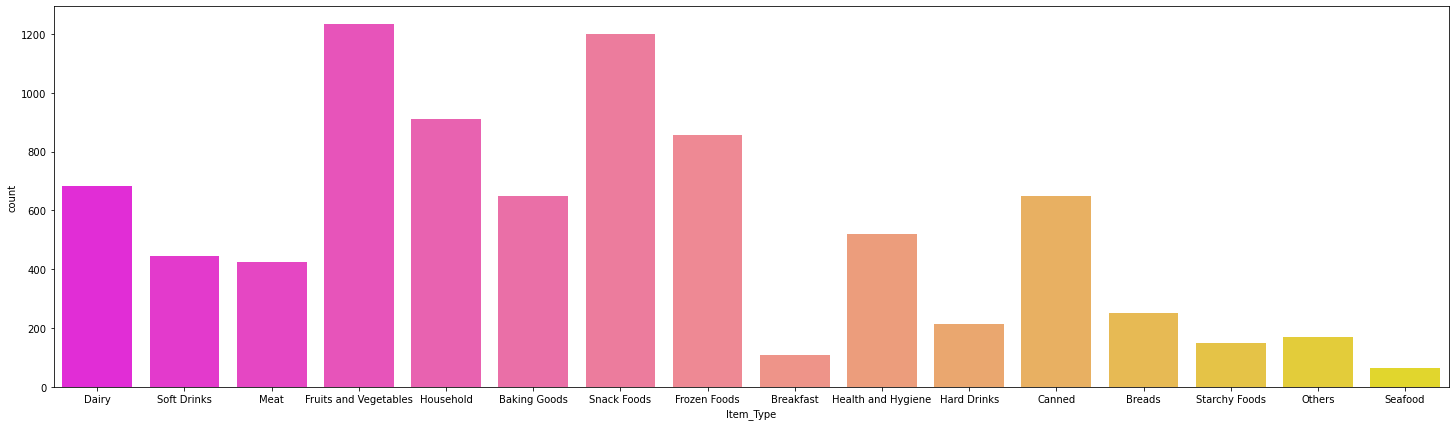

In [25]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

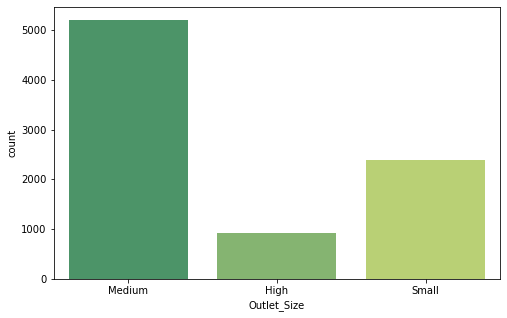

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

* __The Outlets are more of Medium Size__

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

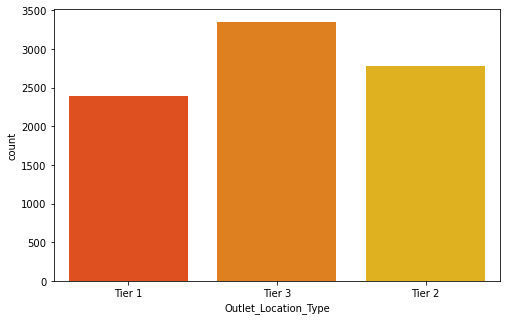

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

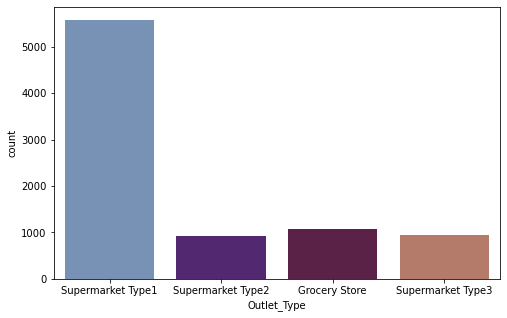

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

* __The Outlets are more of Supermarket Type1__

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

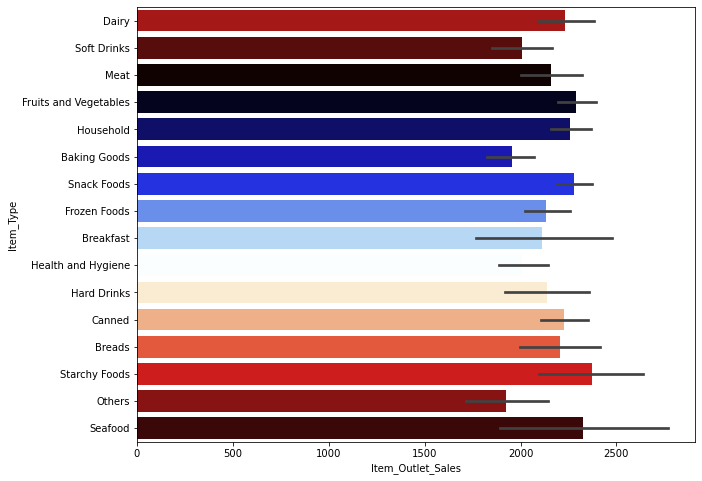

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

### Step 5: Building Model

In [30]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

* __Encoding the required columns from training and test dataset__

In [32]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [34]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [35]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


<AxesSubplot:>

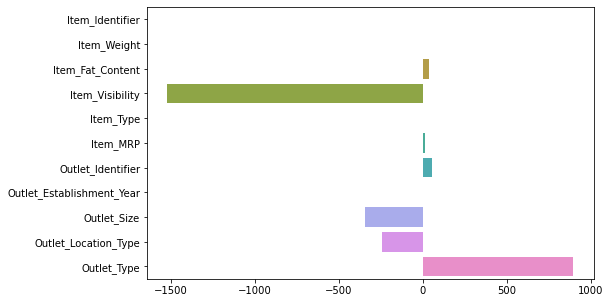

In [36]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

* __Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [37]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1246.1717725051317


* __Validation Set RMSE score is around 1246 from this linear model__

In [62]:
# submission = pd.read_csv('sample_submission_8RXa3c6.csv')
# final_predictions = LR.predict(test)
# submission['Item_Outlet_Sales'] = final_predictions
# #only positive predictions for the target variable
# submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
# submission.to_csv('my_submission.csv', index=False)

In [38]:
#MY WORK SGD REGRESSOR

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [77]:
Pol = PolynomialFeatures(degree=2)
Std = StandardScaler()
Mx = MinMaxScaler()
Mabs = MaxAbsScaler()

In [108]:
X_train_pol = Pol.fit_transform(X_train)
X_train_Std = Std.fit_transform(X_train_pol)
X_train_mx = Mx.fit_transform(X_train_pol)
X_train_mabs = Mabs.fit_transform(X_train_pol)

In [106]:
X_valid_pol = Pol.fit_transform(X_valid)

In [107]:
X_valid_trans = Std.fit_transform(X_valid_pol)

In [105]:
SGDR = SGDRegressor(learning_rate='adaptive',random_state=42,penalty='l1')

In [104]:
#SGDR.get_params()

In [109]:
SGDR.fit(X_train_Std,y_train)

SGDRegressor(learning_rate='adaptive', penalty='l1', random_state=42)

In [110]:
y_hat = SGDR.predict(X_valid_trans)

In [111]:
MSE1= metrics.mean_squared_error(y_valid,y_hat)
rmse1 = sqrt(MSE1)
print("Root Mean Squared Error:",rmse1)

Root Mean Squared Error: 1159.844718402468


In [112]:
print(np.sqrt(mean_squared_error(y_valid,y_hat)))

1159.844718402468


In [100]:
# LINEAR REGRESSOR USING PREPROCESSING

In [101]:
LR.fit(X_train_Std,y_train)
y_hat1 = LR.predict(X_valid_trans)

In [102]:
print(np.sqrt(mean_squared_error(y_valid,y_hat1)))

898020698135.6174


In [117]:
# Decision Trees Regressor USING STD SCALING

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
DT = DecisionTreeRegressor(max_depth=7,random_state=42)

In [138]:
DT.fit(X_train_Std,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [139]:
y_hat2 = DT.predict(X_valid_trans)

In [140]:
print(np.sqrt(mean_squared_error(y_valid,y_hat2)))

1232.3116623350627


In [120]:
# Decision Trees Regressor WITHOUT USING STD SCALING

In [152]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [153]:
y_hat3 = DT.predict(X_valid)

In [154]:
print(np.sqrt(mean_squared_error(y_valid,y_hat3)))

1179.979128294597


In [157]:
# Bagging and Boosting Regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [158]:
RF = RandomForestRegressor(random_state=42)
BG = BaggingRegressor(random_state=42)
ADA = AdaBoostRegressor(random_state=42)
GB = GradientBoostingRegressor(random_state=42)

In [160]:
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [161]:
y_hat4 = RF.predict(X_valid)

In [162]:
print(np.sqrt(mean_squared_error(y_valid,y_hat4)))

1199.0036927317733


In [163]:
BG.fit(X_train,y_train)

BaggingRegressor(random_state=42)

In [166]:
y_hat5 = BG.predict(X_valid)

In [167]:
print(np.sqrt(mean_squared_error(y_valid,y_hat5)))

1237.3620628813526


In [168]:
ADA.fit(X_train,y_train)

AdaBoostRegressor(random_state=42)

In [169]:
y_hat6 = ADA.predict(X_valid)

In [170]:
print(np.sqrt(mean_squared_error(y_valid,y_hat6)))

1325.827155409287


In [171]:
GB.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [172]:
y_hat7 = GB.predict(X_valid)

In [173]:
print(np.sqrt(mean_squared_error(y_valid,y_hat7)))

1151.0226766803385


In [174]:
from xgboost import XGBRegressor

In [199]:
XGBR = XGBRegressor(learning_rate=0.1,n_estimators=100,random_state=42)

In [208]:
XGBR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [209]:
y_hat8 = XGBR.predict(X_valid)

In [210]:
print(np.sqrt(mean_squared_error(y_valid,y_hat8)))

1181.0927979190224


In [203]:
# MLP REGRESSOR

In [211]:
from sklearn.neural_network import MLPRegressor

In [212]:
MLP = MLPRegressor(hidden_layer_sizes=32)

In [219]:
MLP.fit(X_train_Std,y_train)

MLPRegressor(hidden_layer_sizes=32)

In [221]:
y_hat8 = MLP.predict(X_valid_trans)

In [222]:
print(np.sqrt(mean_squared_error(y_valid,y_hat8)))

1193.487945520167
